In [2]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
import sys
print("python" + sys.version)

python3.7.0 (default, Jun 28 2018, 08:04:48) [MSC v.1912 64 bit (AMD64)]


## LOAD the dataset

In [9]:
titanic_df = pd.read_csv("A:\\Udacity Data Sciene Intro\\Titanic\\train.csv")
test_df = pd.read_csv("A:\\Udacity Data Sciene Intro\\Titanic\\test.csv")

In [10]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Removing unnecessary data


In [14]:
#drop unnecessary columns
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket'], axis = 1)
test_df = test_df.drop(['Name','Ticket'], axis = 1)

In [15]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [26]:
#get average, std deviation, number of missing values in both tables
average_age_titanic = titanic_df["Age"].mean()
std_age_titanic = titanic_df["Age"].mean()
count_nan_age_titanic = titanic_df["Age"].isnull().sum()

#get average, std deviation, number of missing values in both tables
average_age_test = test_df["Age"].mean()
std_age_test = test_df["Age"].std()
count_nan_age_test = test_df["Age"].isnull().sum()


#keep ages for plotting later
titanic_ages_old = titanic_df['Age']
test_ages_old = test_df['Age']                 

In [27]:
#generate random numbers to fill up the missing values
#calculate between (mean-std) and (mean+std)

rand_1 = np.random.randint(average_age_titanic - std_age_titanic,
                          average_age_titanic + std_age_titanic,
                          size = count_nan_age_titanic)

rand_2 = np.random.randint(average_age_test - std_age_test,
                          average_age_test + std_age_test,
                          size = count_nan_age_test)

#fill the missing values in Age Column with random values generated
titanic_df["Age"][np.isnan(titanic_df["Age"])] = rand_1
test_df["Age"][np.isnan(test_df["Age"])] = rand_2

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
# convert from float to int
titanic_df['Age'] = titanic_df['Age'].astype(int)
test_df['Age'] = test_df['Age'].astype(int)

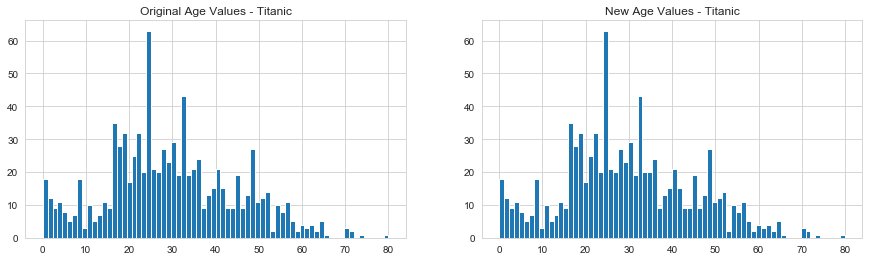

In [32]:
#histogram of train set
fig, (axis1, axis2) = plt.subplots(1, 2, figsize =(15,4))
axis1.set_title('Original Age Values - Titanic')
axis2.set_title('New Age Values - Titanic')

#plot original age values
titanic_ages_old.hist(bins =70, ax = axis1)

#plot new age values
titanic_df['Age'].hist(bins=70, ax=axis2)


In [33]:
titanic_ages_old.describe()

count    891.000000
mean      29.618597
std       15.035040
min        0.000000
25%       19.000000
50%       28.000000
75%       39.500000
max       80.000000
Name: Age, dtype: float64

In [34]:
titanic_df['Age'].describe()

count    891.000000
mean      29.602694
std       15.042687
min        0.000000
25%       19.000000
50%       28.000000
75%       39.500000
max       80.000000
Name: Age, dtype: float64

# Remove Cabin
it has a lot of missing values so it wont be of use for prediction


In [50]:
# only in titanic_df, the 2 missing values are to be filled with the most occured values
# which is S
titanic_df["Embarked"].isnull().sum()

2

In [51]:
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")

In [54]:
titanic_df["Embarked"].isnull()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
861    False
862    False
863    False
864    False
865    False
866    False
867    False
868    False
869    False
870    False
871    False
872    False
873    False
874    False
875    False
876    False
877    False
878    False
879    False
880    False
881    False
882    False
883    False
884    False
885    False
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

# Build a relationship between port of embarkment and Survived(whether a passenger survived or not)

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hp\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


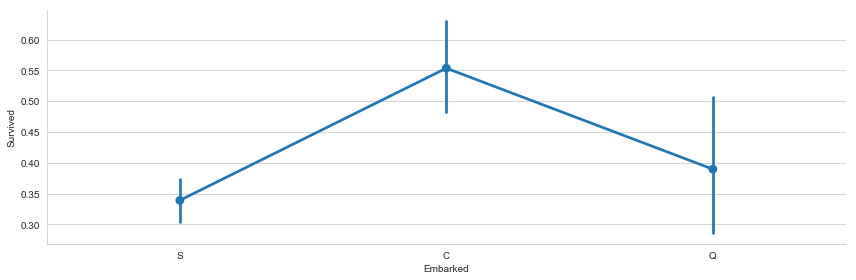

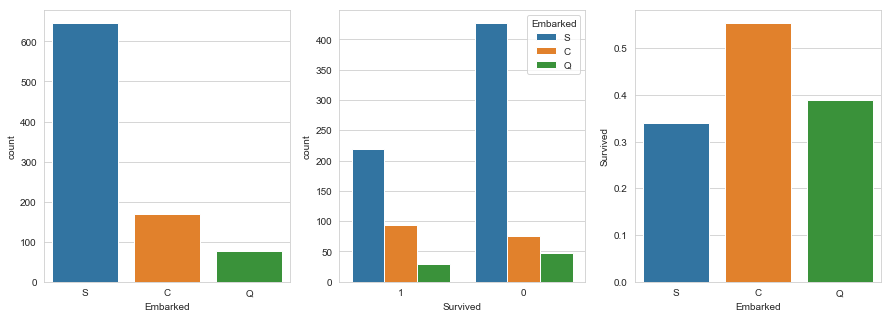

In [55]:
sns.factorplot('Embarked','Survived', data=titanic_df,size=4,aspect=3)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

# sns.factorplot('Embarked',data=titanic_df,kind='count',order=['S','C','Q'],ax=axis1)
# sns.factorplot('Survived',hue="Embarked",data=titanic_df,kind='count',order=[1,0],ax=axis2)
sns.countplot(x='Embarked', data=titanic_df, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=titanic_df, order=[1,0], ax=axis2)

# Group by Embarked, and get the mean for survived passengers for each value in Embarked
embark_perc = titanic_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3)

In [56]:
# EITHER, consider Embarked column in predictions,
# and remove "S" dummy variable, 
# and leave "C" & "Q", since they seem to have a good rate for Survival.

In [57]:
embark_dummies_titanic  = pd.get_dummies(titanic_df['Embarked'])
embark_dummies_titanic.drop(['S'], axis=1, inplace=True)

embark_dummies_test  = pd.get_dummies(test_df['Embarked'])
embark_dummies_test.drop(['S'], axis=1, inplace=True)

titanic_df = titanic_df.join(embark_dummies_titanic)
test_df    = test_df.join(embark_dummies_test)

In [58]:
# OR, don't create dummy variables for Embarked column, just drop it, 
# because logically, Embarked doesn't seem to be useful in prediction.

titanic_df.drop(['Embarked'], axis=1,inplace=True)
test_df.drop(['Embarked'], axis=1,inplace=True)